# Deployment module : Getaround Project

In [1]:
# you might have to install openpyxl module
!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import openpyxl

# plot lib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
df_pricing = pd.read_csv('src/get_around_pricing_project.csv')
df_delay_analysis = pd.read_excel('src/get_around_delay_analysis.xlsx')

## Exploratory Data Analysis part 1 :
- Pricing dataset 

In [4]:
# Basic stats
print("Number of rows : {}".format(df_pricing.shape[0]))
print()

print("Display of dataset: ")
display(df_pricing.head(10))
print()

print("Basics statistics: ")
data_desc = df_pricing.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df_pricing.isnull().sum()/df_pricing.shape[0])

Number of rows : 4843

Display of dataset: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
5,5,Citroën,152352,225,petrol,black,convertible,True,True,False,False,True,True,True,131
6,6,Citroën,205219,145,diesel,grey,convertible,True,True,False,False,True,True,True,111
7,7,Citroën,115560,105,petrol,white,convertible,True,True,False,False,False,True,True,78
8,8,Peugeot,123886,125,petrol,black,convertible,True,False,False,False,False,True,True,79
9,9,Citroën,139541,135,diesel,white,convertible,False,False,False,False,True,False,True,132



Basics statistics: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843.000000,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,NaN,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,NaN,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,NaN,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,2421.000000,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,1398.198007,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,0.000000,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,1210.500000,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,2421.000000,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,3631.500000,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000



Percentage of missing values: 


Unnamed: 0                   0.0
model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

In [5]:
df_pricing.drop(columns='Unnamed: 0', inplace=True)

In [6]:
df_pricing['fuel'].value_counts()

diesel           4641
petrol            191
hybrid_petrol       8
electro             3
Name: fuel, dtype: int64

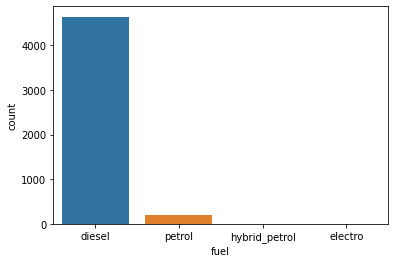

In [7]:
sns.countplot(data=df_pricing, x='fuel')
plt.show()

## Exploratory Data Analysis part 2 :
- Delay dataset 

In [8]:
# Basic stats
print("Number of rows : {}".format(df_delay_analysis.shape[0]))
print()

print("Type informations : {}" .format(df_delay_analysis.info()))

print("Display of dataset: ")
display(df_delay_analysis.head(10))
print()

print("Basics statistics: ")
data_desc = df_delay_analysis.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df_delay_analysis.isnull().sum()/df_delay_analysis.shape[0])

Number of rows : 21310

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB
Type informations : None
Display of dataset: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN
8,512475,322502,mobile,canceled,NaN,NaN,NaN
9,513434,256528,connect,ended,23.0,NaN,NaN



Basics statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000



Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

In [9]:
dropna = df_delay_analysis['delay_at_checkout_in_minutes'].dropna()
valeur = set(dropna)
valeur = list(valeur)

for value in valeur:
    print(value)
    if value > 0.0 and value < 1.0:
        print(value)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
148.0
149.0
150.0
151.0
152.0
153.0
154.0
155.0
156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
178.0
179.0
180.0
181.0
182.0
183.0
184.0


In [10]:
df_delay_analysis['checkin_type'].value_counts()

mobile     17003
connect     4307
Name: checkin_type, dtype: int64

In [11]:
df_delay_analysis.columns

Index(['rental_id', 'car_id', 'checkin_type', 'state',
       'delay_at_checkout_in_minutes', 'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes'],
      dtype='object')

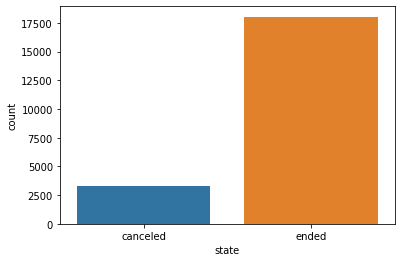

In [12]:
sns.countplot(data=df_delay_analysis, x='state')
plt.show()

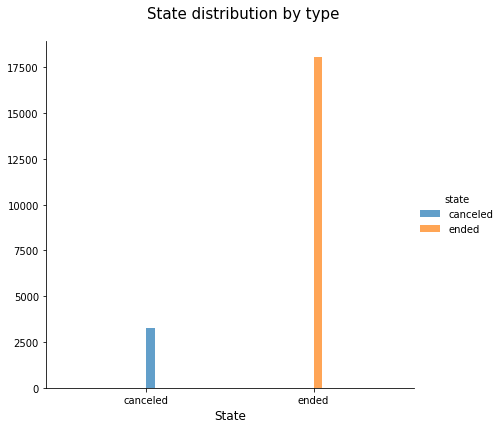

In [13]:
g = sns.FacetGrid(df_delay_analysis, hue='state', height= 6)
g.map(plt.hist, 'state', alpha= 0.7, bins=20)
g.set_xlabels('State', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('State distribution by type', fontsize=15)
g.add_legend()
plt.show()

In [14]:
# Correlation matrix
corr_matrix = df_delay_analysis.corr().round(2)

import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())


fig.show()


In [15]:
df_delay_analysis.columns

Index(['rental_id', 'car_id', 'checkin_type', 'state',
       'delay_at_checkout_in_minutes', 'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes'],
      dtype='object')

<AxesSubplot:xlabel='time_delta_with_previous_rental_in_minutes', ylabel='Density'>

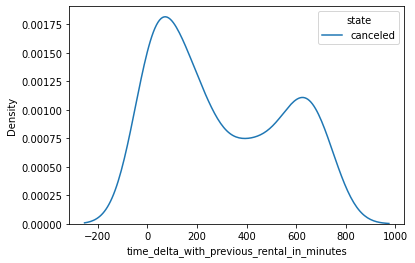

In [16]:
sns.kdeplot(
    data=df_delay_analysis[df_delay_analysis['state']=="canceled"],
    #y="state", 
    x="time_delta_with_previous_rental_in_minutes",
    #col="state", 
    #kind='line', 
    hue='state'
)

<AxesSubplot:xlabel='time_delta_with_previous_rental_in_minutes', ylabel='Density'>

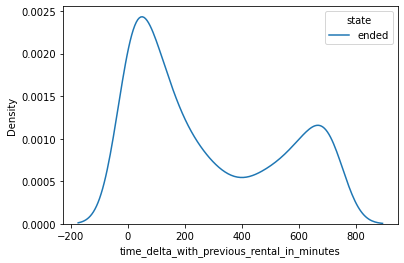

In [17]:
sns.kdeplot(
    data=df_delay_analysis[df_delay_analysis['state']=="ended"],
    #y="state", 
    x="time_delta_with_previous_rental_in_minutes",
    #col="state", 
    #kind='line', 
    hue='state'
)

<AxesSubplot:xlabel='delay_at_checkout_in_minutes', ylabel='Density'>

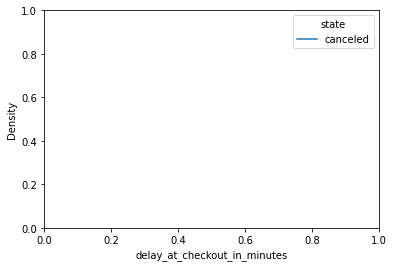

In [18]:
sns.kdeplot(
    data=df_delay_analysis[df_delay_analysis['state']=="canceled"],
    #y="state", 
    x="delay_at_checkout_in_minutes",
    warn_singular=False,
    #col="state", 
    #kind='line', 
    hue='state'
)

<AxesSubplot:xlabel='delay_at_checkout_in_minutes', ylabel='Density'>

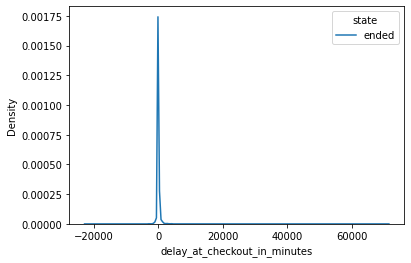

In [19]:
sns.kdeplot(
    data=df_delay_analysis[df_delay_analysis['state']=="ended"],
    #y="state", 
    x="delay_at_checkout_in_minutes",
    #col="state", 
    #kind='line', 
    hue='state'
)

<AxesSubplot:xlabel='time_delta_with_previous_rental_in_minutes', ylabel='Count'>

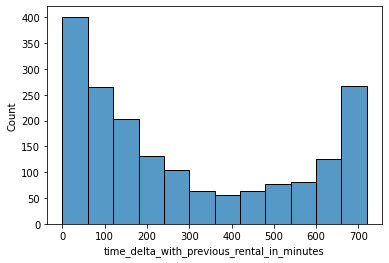

In [20]:
sns.histplot(df_delay_analysis, x='time_delta_with_previous_rental_in_minutes')

<AxesSubplot:xlabel='delay_at_checkout_in_minutes', ylabel='Count'>

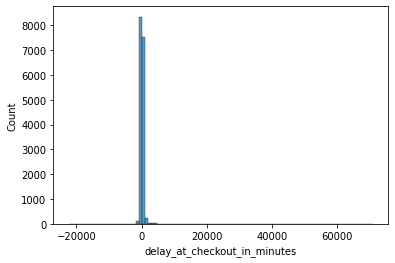

In [21]:
sns.histplot(df_delay_analysis, x='delay_at_checkout_in_minutes', bins=100)

<AxesSubplot:xlabel='delay_at_checkout_in_minutes', ylabel='Count'>

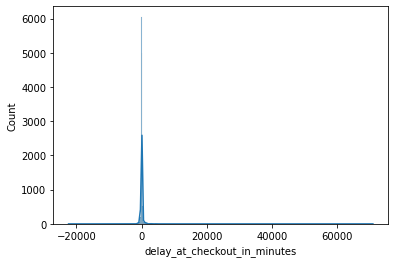

In [22]:
sns.histplot(df_delay_analysis, x='delay_at_checkout_in_minutes', thresh='NaN', kde=True, bins=1000)

In [23]:
px.histogram(df_delay_analysis, x='delay_at_checkout_in_minutes')

In [24]:
df_canceled = df_delay_analysis[df_delay_analysis['state']=="canceled"]

In [25]:
df_canceled.shape

(3265, 7)

In [26]:
df_canceled.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
8,512475,322502,mobile,canceled,NaN,NaN,NaN
10,513743,330658,mobile,canceled,NaN,NaN,NaN
11,514161,366037,connect,canceled,NaN,NaN,NaN


In [27]:
df_canceled['delay_at_checkout_in_minutes'].max()

-17468.0

In [28]:
display(100*df_canceled.isnull().sum()/df_canceled.shape[0])

rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  99.969372
previous_ended_rental_id                      92.986217
time_delta_with_previous_rental_in_minutes    92.986217
dtype: float64

In [29]:
df_delay_analysis.groupby('state')['checkin_type'].value_counts()

state     checkin_type
canceled  mobile           2467
          connect           798
ended     mobile          14536
          connect          3509
Name: checkin_type, dtype: int64

In [30]:
df_delay_analysis.set_index(['state']).isnull().sum()

rental_id                                         0
car_id                                            0
checkin_type                                      0
delay_at_checkout_in_minutes                   4964
previous_ended_rental_id                      19469
time_delta_with_previous_rental_in_minutes    19469
dtype: int64

In [31]:
px.histogram(data_frame=df_delay_analysis, x='delay_at_checkout_in_minutes')

In [32]:
px.histogram(data_frame=df_delay_analysis[df_delay_analysis['state']=="canceled"], x='delay_at_checkout_in_minutes')

In [33]:
df_delay_analysis_dropna = df_delay_analysis[df_delay_analysis['delay_at_checkout_in_minutes'].notna()]


In [34]:
df_delay_analysis_dropna.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN


In [35]:
df_delay_analysis['car_id'].value_counts()

334190    33
392479    29
241021    29
342699    27
300505    24
          ..
372160     1
297623     1
403246     1
267750     1
408598     1
Name: car_id, Length: 8143, dtype: int64

In [36]:
df_delay_analysis_dropna.isnull().any()

rental_id                                     False
car_id                                        False
checkin_type                                  False
state                                         False
delay_at_checkout_in_minutes                  False
previous_ended_rental_id                       True
time_delta_with_previous_rental_in_minutes     True
dtype: bool

In [37]:
df_delay_analysis_dropna.columns

Index(['rental_id', 'car_id', 'checkin_type', 'state',
       'delay_at_checkout_in_minutes', 'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes'],
      dtype='object')

In [38]:
df_delay_analysis_dropna.describe(include='all')

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,16346.000000,16346.000000,16346,16346,16346.000000,1515.000000,1515.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,12944,16345,NaN,NaN,NaN
mean,549860.510522,349017.233452,NaN,NaN,59.701517,549903.475908,276.871287
std,13587.634925,58268.394226,NaN,NaN,1002.561635,13385.995247,254.865947
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540869.250000,316924.000000,NaN,NaN,-36.000000,540626.000000,60.000000
50%,550403.000000,367531.000000,NaN,NaN,9.000000,550415.000000,180.000000
75%,560268.500000,393750.000000,NaN,NaN,67.000000,560789.000000,540.000000


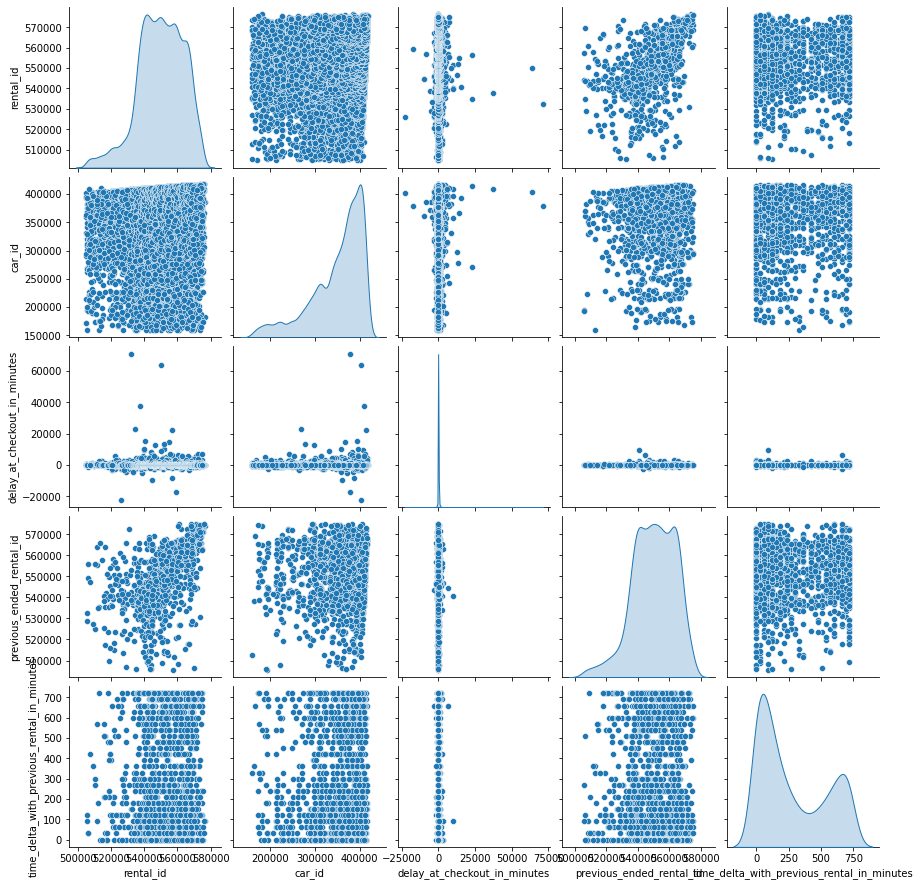

In [39]:
sns.pairplot(df_delay_analysis_dropna, diag_kind='kde')

In [40]:
df_delay_analysis.columns

Index(['rental_id', 'car_id', 'checkin_type', 'state',
       'delay_at_checkout_in_minutes', 'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes'],
      dtype='object')

<AxesSubplot:>

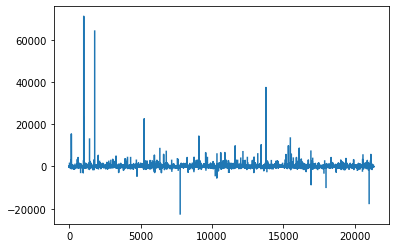

In [41]:
df_delay_analysis['delay_at_checkout_in_minutes'].plot(kind='line')

In [42]:
df_delay_analysis.columns

Index(['rental_id', 'car_id', 'checkin_type', 'state',
       'delay_at_checkout_in_minutes', 'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes'],
      dtype='object')

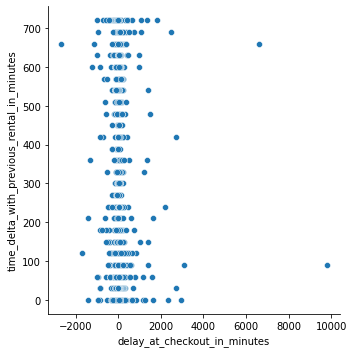

In [43]:
sns.relplot(x=df_delay_analysis['delay_at_checkout_in_minutes'], y=df_delay_analysis['time_delta_with_previous_rental_in_minutes'])

<AxesSubplot:xlabel='delay_at_checkout_in_minutes'>

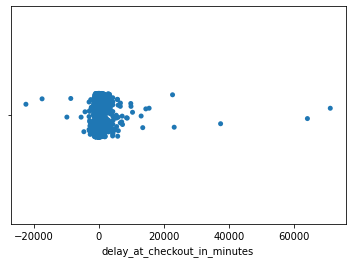

In [44]:
sns.stripplot(x=df_delay_analysis['delay_at_checkout_in_minutes'])

In [45]:
df_canceled_2 = df_delay_analysis[df_delay_analysis['state']=="canceled"]
df_ended_2 = df_delay_analysis[df_delay_analysis['state']=="ended"]

In [46]:
df_delay_analysis.groupby('state')['checkin_type'].value_counts()

state     checkin_type
canceled  mobile           2467
          connect           798
ended     mobile          14536
          connect          3509
Name: checkin_type, dtype: int64

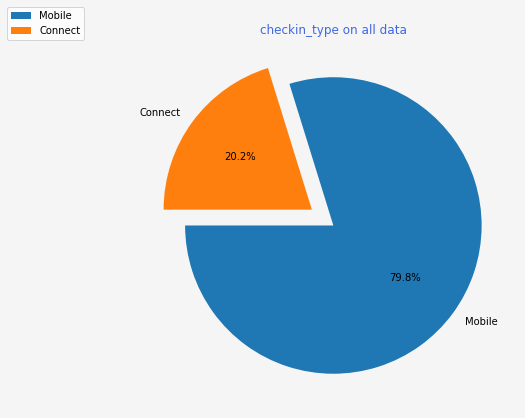

In [47]:
fig = plt.figure(figsize=(15,15), facecolor='whitesmoke')
labels = 'Mobile','Connect',
size3 = df_delay_analysis['checkin_type'].value_counts()
plt.subplot(2, 2, 1)
plt.pie(size3, 
labels=labels, 
autopct='%1.1f%%',
textprops={'color':'black'},
explode=[0, 0.18], 
startangle = 180
)
plt.title('checkin_type on all data', fontdict={'color':'royalblue'})
plt.legend(loc=(-0.38,1))
plt.show()

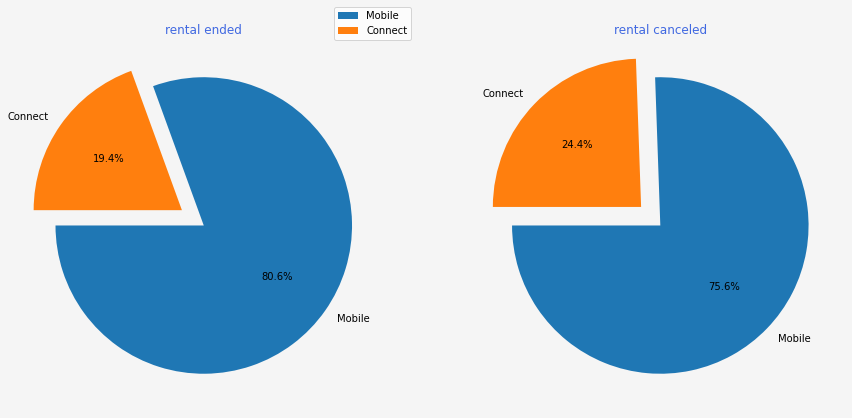

In [48]:
fig = plt.figure(figsize=(15,15), facecolor='whitesmoke')

labels = 'Mobile','Connect',

size1 = df_ended_2.groupby('state')['checkin_type'].value_counts()
size2 = df_canceled_2.groupby('state')['checkin_type'].value_counts()
# size3 = df_delay_analysis.groupby('state')['checkin_type'].value_counts()

plt.subplot(2, 2, 1)
plt.pie(size1, 
labels=labels, 
autopct='%1.1f%%',
textprops={'color':'black'},
explode=[0, 0.18], 
startangle = 180
)
plt.title('rental ended', fontdict={'color':'royalblue'})

plt.subplot(2, 2, 2)
plt.pie(size2,
labels=labels, 
autopct='%1.1f%%',
textprops={'color':'black'},
explode=[0, 0.18], 
startangle = 180
)
plt.title('rental canceled', fontdict={'color':'royalblue'})
plt.legend(loc=(-0.38,1))
plt.show()